# Vehicle Routing Problem (VRP)

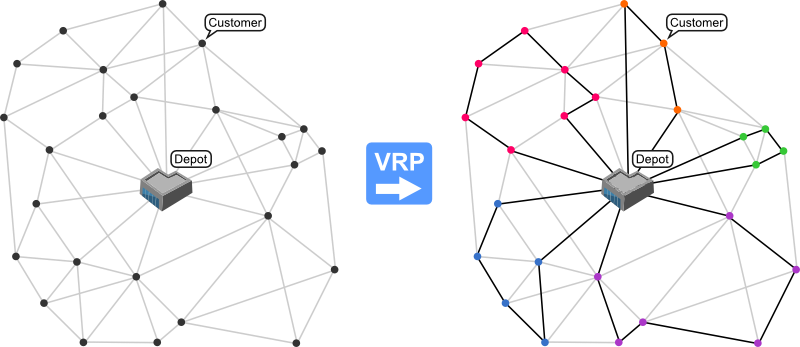

In [229]:
import gurobipy
import numpy as np
import matplotlib.pyplot as plt

[https://www.gurobi.com/](https://www.gurobi.com/) A really good optimization software used by companies like toyota, mercedes, basf etc.

## Generating problem instance...

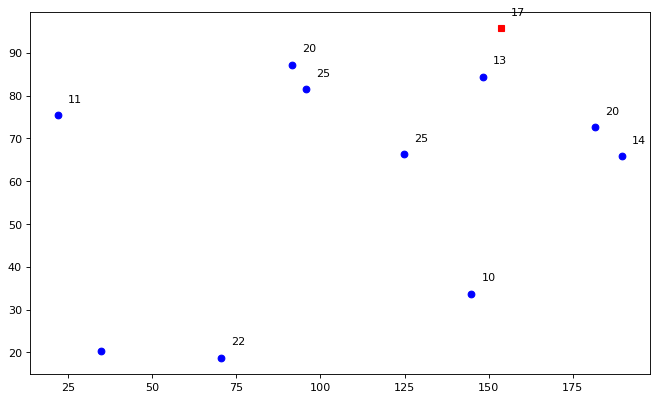

In [230]:
#Input Data
rnd = np.random
n = 10
xc = rnd.rand(n+1)*200
yc = rnd.rand(n+1)*100
N = [i for i in range(1,n+1)]
V = [0] + N
A = [(i,j) for i in V for j in V if i != j]
c = {(i,j): np.hypot(xc[i]-xc[j], yc[i]-yc[j]) for i,j in A}
Q = 50
q = {i: rnd.randint(10,30) for i in N}
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(xc[0], yc[0], c='r', marker='s')
plt.scatter(xc[1:], yc[1:], c = 'b')


for i, txt in enumerate(q):
    plt.annotate(q[txt], (xc[i]+3, yc[i]+3))



## Building the mathematical model

In [231]:
from gurobipy import Model, GRB, quicksum

In [232]:
mdl = Model("CVRP")
mdl.setParam('TimeLimit', 30)

Set parameter TimeLimit to value 30


In [269]:
x = mdl.addVars(A, vtype=GRB.BINARY)
u = mdl.addVars(N, vtype=GRB.CONTINUOUS)

In [234]:
mdl.modelSense = GRB.MINIMIZE

In [270]:
mdl.setObjective(quicksum(x[a]*c[a] for a in A))

min! $\sum_{i,j \in \mathcal{A}}  c_{i,j} \cdot x_{i,j}$ 

$\sum_{j \in \mathcal{V}, j \neq i}  x_{i,j} = 1 \;\; \forall i \in N $ 

$\sum_{j \in \mathcal{V}, j \neq i}  x_{i,j} = 1 \;\; \forall j \in N $ 

if $x_{i,j} \rightarrow u_i + q_j = u_j \,\,\, \forall  k \in \mathcal{K} ,t \in \mathcal{T}$

$q_i \leq u_i \leq Q \; \forall i \in N$

$x_{i,j} \in {0,1}$

In [271]:
mdl.addConstrs(quicksum(x[i,j] for j in V if j!=i)== 1 for i in N);
mdl.addConstrs(quicksum(x[i,j] for i in V if j!=i)== 1 for j in N);
mdl.addConstrs((x[i,j] == 1) >> (u[i] + q[i] == u[j])
              for i,j in A if i!=0 and j!=0);
mdl.addConstrs(u[i] >= q[i] for  i in N);
mdl.addConstrs(u[i] <= Q for i in N);

## Perform Solution procedure with gurobi

In [272]:
mdl.optimize()

Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 80 rows, 240 columns and 440 nonzeros
Model fingerprint: 0xc915fd87
Model has 180 general constraints
Variable types: 20 continuous, 220 integer (220 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [7e+00, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+01]
  GenCon rhs range [1e+01, 3e+01]
  GenCon coe range [1e+00, 1e+00]

MIP start from previous solve produced solution with objective 1415.96 (0.06s)
MIP start from previous solve produced solution with objective 1124.97 (0.07s)
MIP start from previous solve produced solution with objective 903.14 (0.07s)
MIP start from previous solve produced solution with objective 819.833 (0.10s)
MIP start from previous solve produced solution with objective 693.589 (0.13s)
MIP start from previous solve produced solution with objective 691

In [273]:
active_arcs = [a for a in A if x[a].x > 0.99]

In [274]:
def FindEdgeByStartingNode(Node, li):
    for e in li:
        if(e[0] == Node):
            return e

def GetRouteRemoveEdgesFromLi(startingEdge, li): 
    x = startingEdge
    tour = []
    tour.append(startingEdge) 
    while(True):
        x = findEdgeByStartingNode(x[1], li)
        tour.append(x)
        
        if(x[1] == 0):
            break            
        #li.pop(li.index(x))   
    return tour

numberOfRoutes = 0
for e in active_arcs:
    if(e[0] == 0):
        numberOfRoutes+=1
routes = []

for i in range(0,numberOfRoutes+1):
    routes.append(GetRouteRemoveEdgesFromLi(active_arcs[i],active_arcs))
    #we get error message when amoutn of routes is less than 3
    
active_arcs = [a for a in A if x[a].x > 0.99]

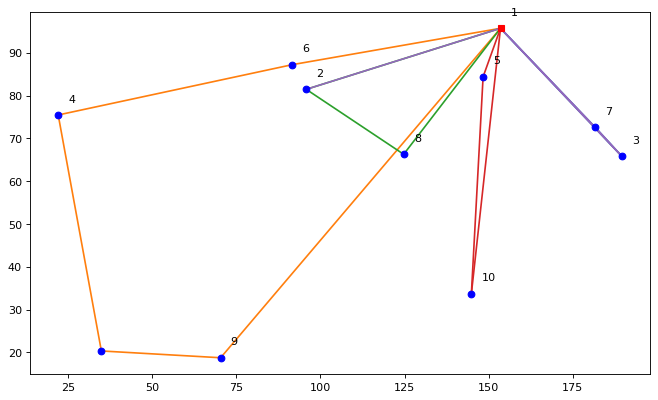

In [275]:
color = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan']

plt.figure(figsize=(10, 6), dpi=80) 
for idx, route in enumerate(routes):
    for i,j in route:
        plt.plot([xc[i], xc[j]], [yc[i], yc[j]], c=f'{color[idx]}', zorder=0)
  
plt.plot(xc[0], yc[0], c='r', marker='s')
plt.scatter(xc[1:], yc[1:], c='b')

for i, txt in enumerate(q):
    plt.annotate(txt, (xc[i]+3, yc[i]+3))

# Things to consider when thinking about planning of intralogistic processes